<a href="https://colab.research.google.com/github/miczkejedrzej/MNLP-project-1/blob/main/First_test_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Import of the training data

from google.colab import files
uploaded = files.upload()

# Import of moduls

!pip install wikidata --quiet

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from tqdm.auto import tqdm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading the data
train_df = pd.read_csv('[MNLP 2025 HW1] train set [PUBLIC] - train_cleaned.tsv', sep='\t')

Saving [MNLP 2025 HW1] train set [PUBLIC] - train_cleaned.tsv to [MNLP 2025 HW1] train set [PUBLIC] - train_cleaned (1).tsv


# Cleaning the labels

In [51]:
# Select the labels and associated labels to correct
to_correct = train_df[train_df["label"].isin(['cultural agn','cultural represent', 'cultural ex', 'cultural ag'])][['item', 'label']]

# Create the mapping for correction
mapping_correction = {
  'cultural agn' : 'cultural agnostic',
  'cultural represent' : 'cultural representative',
  'cultural ex' : 'cultural exclusive',
  'cultural ag' : 'cultural agnostic'
}

# Apply the correction
to_correct['label'] = to_correct['label'].map(mapping_correction)

# We update the transformations to the initial dataset
train_df.set_index('item', inplace=True)
to_correct.set_index('item', inplace=True)

train_df.update(to_correct)
train_df.reset_index(inplace=True)

# Select the items that have no label, or with label 'cultural', or 'cult'
to_classify = train_df[(train_df["label"].isin(["cultural", "cult"])) | (train_df["label"].isna())][['item', 'name', 'description']]

# Create the dictionnary for the mapping
categories = {
    'http://www.wikidata.org/entity/Q957033': 'cultural representative',
    'http://www.wikidata.org/entity/Q30327019': 'cultural agnostic',
    'http://www.wikidata.org/entity/Q811361': 'cultural agnostic',
    'http://www.wikidata.org/entity/Q12014207': 'cultural agnostic',
    'http://www.wikidata.org/entity/Q257907': 'cultural exclusive',
    'http://www.wikidata.org/entity/Q1136336': 'cultural representative',
    'http://www.wikidata.org/entity/Q67111': 'cultural representative',
    'http://www.wikidata.org/entity/Q1089672': 'cultural representative',
    'http://www.wikidata.org/entity/Q85755629': 'cultural representative',
    'http://www.wikidata.org/entity/Q206912': 'cultural agnostic',
    'http://www.wikidata.org/entity/Q23228': 'cultural agnostic',
    'http://www.wikidata.org/entity/Q3196604': 'cultural representative',
    'http://www.wikidata.org/entity/Q1940624': 'cultural representative'
}

# Apply the classification
to_classify['label'] = to_classify['item'].map(categories)

# We update the transformations to the initial dataset
train_df.set_index('item', inplace=True)
to_classify.set_index('item', inplace=True)

train_df.update(to_classify)
train_df.reset_index(inplace=True)

dict_mapping ={'cultural exclusive': 0, 'cultural representative': 1, 'cultural agnostic': 2}

train_df['label'] = train_df['label'].map(dict_mapping)
train_df['label'] = train_df['label'].apply(lambda x: np.array(x))

In [52]:
train_df

,item,name,description,type,category,subcategory,label
0,http://www.wikidata.org/entity/Q306,Sebastián Piñera,Chilean entrepreneur and politician (1949–2024),entity,politics,politician,0
1,http://www.wikidata.org/entity/Q12735,John Amos Comenius,"Czech teacher, educator, philosopher and write...",entity,politics,politician,1
2,http://www.wikidata.org/entity/Q1752,Macrinus,Roman emperor from 217 to 218,entity,politics,politician,1
3,http://www.wikidata.org/entity/Q1639,Lamine Diack,Senegalese sports manager (1933–2021),entity,politics,politician,1
4,http://www.wikidata.org/entity/Q9588,Richard Nixon,President of the United States from 1969 to 1974,entity,politics,politician,1
...,...,...,...,...,...,...,...
6246,http://www.wikidata.org/entity/Q321103,Bühl,"quarter of Tübingen, Baden-Württemberg, Germany",entity,geography,neighborhood,0
6247,http://www.wikidata.org/entity/Q338167,Tenderloin,area of New York City during the late 19th and...,entity,geography,neighborhood,0
6248,http://www.wikidata.org/entity/Q66991,Schinznach-Dorf,former municipality and current district of Sc...,entity,geography,neighborhood,0
6249,http://www.wikidata.org/entity/Q66922,Ependes,village and former municipality in Bois-d'Amon...,entity,geography,neighborhood,0


In [53]:
train_df = train_df.rename(columns={"description": "sentence"})
train_df["idx"] = range(len(train_df))

from datasets import Dataset

train_dict = train_df[['idx','sentence','label']].to_dict(orient="list")
train_dataset = Dataset.from_dict(train_dict)

In [54]:
train_dataset

Dataset({
    features: ['idx', 'sentence', 'label'],
    num_rows: 6251
})

In [64]:
!pip install datasets --quiet

from datasets import load_dataset
from huggingface_hub import login

# First : Create an account on Hugging face, and create also a token

# Connection to hugging face
login(token="")

dataset = load_dataset('sapienzanlp/nlp2025_hw1_cultural_dataset')

dev_df = dataset['validation'].to_pandas()

In [65]:
dict_mapping ={'cultural exclusive': 0, 'cultural representative': 1, 'cultural agnostic': 2}

dev_df['label'] = dev_df['label'].map(dict_mapping)
dev_df['label'] = dev_df['label'].apply(lambda x: np.array(x))

In [66]:
dev_df

,item,name,description,type,category,subcategory,label
0,http://www.wikidata.org/entity/Q15786,1. FC Nürnberg,"German sports club based in Nuremberg, Bavaria",entity,sports,sports club,1
1,http://www.wikidata.org/entity/Q268530,77 Records,UK record label,entity,music,record label,0
2,http://www.wikidata.org/entity/Q216153,A Bug's Life,1998 animated film directed by John Lasseter a...,entity,comics and anime,animated film,1
3,http://www.wikidata.org/entity/Q593,A Gang Story,2011 film by Olivier Marchal,entity,films,film,0
4,http://www.wikidata.org/entity/Q192185,Aaron Copland,"American composer, composition teacher, writer...",entity,performing arts,choreographer,1
...,...,...,...,...,...,...,...
295,http://www.wikidata.org/entity/Q36180,writer,person who uses written words to communicate i...,concept,visual arts,artist,2
296,http://www.wikidata.org/entity/Q156316,Würzburg Residence,cultural heritage monument D-6-63-000-454 (0) ...,entity,history,museum,1
297,http://www.wikidata.org/entity/Q56911,xunfu,high government official of the Chinese Ming a...,concept,politics,politician,0
298,http://www.wikidata.org/entity/Q377,Yanka Kupala,Belarusian writer (1882–1942),entity,literature,poet,1


In [67]:
dev_df = dev_df.rename(columns={"description": "sentence"})
dev_df["idx"] = range(len(dev_df))

from datasets import Dataset

dev_dict = dev_df[['idx','sentence','label']].to_dict(orient="list")
dev_dataset = Dataset.from_dict(dev_dict)

In [68]:
dev_dataset

Dataset({
    features: ['idx', 'sentence', 'label'],
    num_rows: 300
})

In [72]:
from datasets import Dataset, DatasetDict

datasets = DatasetDict({
    "train": train_dataset,
    "dev": dev_dataset
})

In [73]:
datasets

DatasetDict({
    train: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 6251
    })
    dev: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 300
    })
})

# Test

In [55]:
!pip install accelerate -U --quiet
!pip install datasets --quiet
!pip install evaluate --quiet

In [56]:
import torch
import numpy as np
import pandas as pd
from typing import Dict
import torch
from datasets import load_dataset
from transformers import DataCollatorWithPadding

from datasets import load_dataset
from transformers import (
    AutoConfig,
    AutoModelForSequenceClassification,
    AutoTokenizer,
    EvalPrediction,
    Trainer,
    TrainingArguments,
    set_seed,
)


### Model Parameters
# we will use with Distil-BERT
language_model_name = "distilbert-base-uncased"

### Training Argurments

# this GPU should be enough for this task to handle 32 samples per batch
batch_size = 32

# optim
learning_rate = 1e-4
weight_decay = 0.001 # we could use e.g. 0.01 in case of very low and very high amount of data for regularization

# training
epochs = 1
device = "cuda" if torch.cuda.is_available() else "cpu"


set_seed(42)

In this example we will use **Sentiment Tree Bank corpus (SST2)**, one of the main benchmark for binary sentiment analysis task.

The dataset if freely available through Huggingface Datasets.

In [23]:
# load our dataset
sst2_dataset = load_dataset("stanfordnlp/sst2")

README.md:   0%|          | 0.00/5.27k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

In [26]:
## Let's see an example...
print(f"Sentence: {sst2_dataset['train']['sentence'][12]}")
print(f"Sentiment: {'Positive' if sst2_dataset['train']['label'][12] == 1 else 'Negative'}")

Sentence: the part where nothing 's happening , 
Sentiment: Negative


In [ ]:
## The structure of the huggingface dataset.
## Here the test set cannot be used since is a blind test set, so there aren't the gold labels.
sst2_dataset

DatasetDict({
    train: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 872
    })
    test: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 1821
    })
})

In [25]:
sst2_dataset['train']

Dataset({
    features: ['idx', 'sentence', 'label'],
    num_rows: 67349
})

### Metric Definition

Looking only at cross entropy loss cannot allow us to understand effectivelly the real capabilities of our NLP model. So let's define a standard method to compute:

- **Accuracy** metric
- **F1** metric

In [83]:
import evaluate

# Metrics

def compute_metrics(eval_pred):

    load_accuracy = evaluate.load("accuracy")
    load_f1 = evaluate.load("f1")

    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
    f1 = load_f1.compute(predictions=predictions, references=labels, average="weighted")["f1"]

    return {"accuracy": accuracy, "f1": f1}


## The Model

We will rely on the Huggingface **AutoModelForSequenceClassification** class from huggingface repository. This is a wrapper for encoder-only models, that allow us to simply create a model suitable to solve a classification task over textual sentences.

### BERT Encoding

We use a BERT-style pretrained encoder model, in this setting, we rely on the tokenization practices of those models.

Each sentence is:
- Splitted in tokens
- Added special tokens (\[CLS\], \[SEP\])
- Sum Position Embeddings
- Sum Segment Embeddings (Deprecated)

![alt text](https://miro.medium.com/v2/resize:fit:998/1*EKzyGf_l0e57XN491_YAyg.png)

### Sentence Classification

In the previous notebook you saw how to train a token level classifier to solve NER task, learning a MLP over each tokens of the input sentence. In the setting of sentence level classification the standard approaches apply a MLP over the [CLS] token's embedding of the last encoder layer. This is because the [CLS] token contains a lot of information about the **semantic and syntactitc** structure of the input sentence.

![alt text](https://jalammar.github.io/images/bert-classifier.png "Sentence Classification")

In [84]:
## Initialize the model
model = AutoModelForSequenceClassification.from_pretrained(language_model_name,
                                                                   ignore_mismatched_sizes=True,
                                                                   output_attentions=False, output_hidden_states=False,
                                                                   num_labels=3) # number of the classes

# Load the pretrained tokenizer
tokenizer = AutoTokenizer.from_pretrained(language_model_name)

# Set the data collator
# Function used to prepare the data before the training.
# the data collator function used here apply a zero-padding on the elements in the batch
# the padding is needed to have a "full" form of the batches
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

def tokenize_function(examples):
    return tokenizer(examples["sentence"], padding=True, truncation=True)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


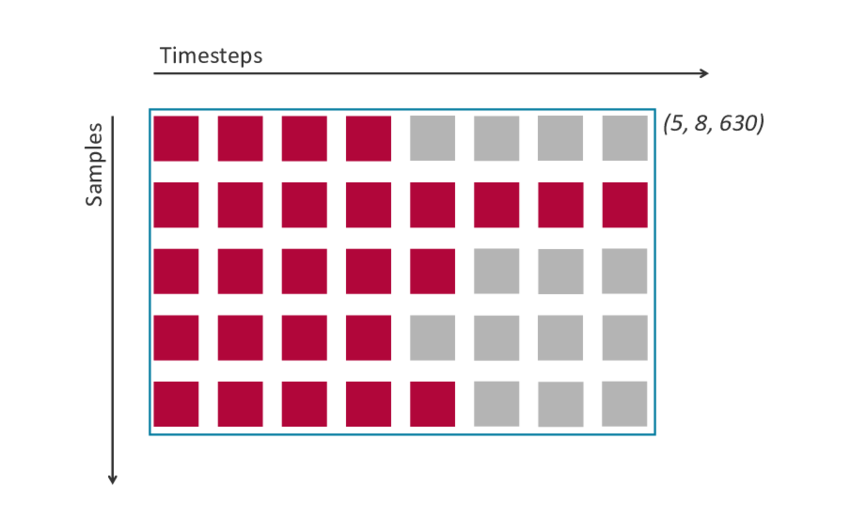

Here you can see a padded batch, The **GRAY** elements are added to have the same size for each sample.

**Data collators** are objects that will form a batch by using a list of dataset elements as input. These elements are of the same type as the elements of train_dataset or eval_dataset.

Link to huggingface documentation for the Data Collator functions (https://huggingface.co/docs/transformers/main_classes/data_collator)

In [85]:
# Tokenize the dataset ...
print("Tokenize the dataset ...")
tokenized_datasets = datasets.map(tokenize_function, batched=True)

Tokenize the dataset ...


Map:   0%|          | 0/6251 [00:00<?, ? examples/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

## Model Training

To train a transformer model you can rely on the **Trainer** class of Huggingface (https://huggingface.co/docs/transformers/main_classes/trainer).

The Trainer class allows you to save many lines of code, and makes your code much more readable.

To initialize the Trainer class you have to define a **TrainerArguments** object.

In [86]:
training_args = TrainingArguments(
    output_dir="training_dir",                    # output directory [Mandatory]
    num_train_epochs=epochs,                      # total number of training epochs
    per_device_train_batch_size=batch_size,       # batch size per device during training
    warmup_steps=500,                             # number of warmup steps for learning rate scheduler
    weight_decay=weight_decay,                    # strength of weight decay
    save_strategy="no",
    learning_rate=learning_rate,                  # learning rate
    report_to="none",
    logging_dir="sentiment_analysis_logs"         # use it later to get the training curves
)

In [87]:
trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_datasets['train'],
   eval_dataset=tokenized_datasets["dev"],
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)

In [88]:
# Let's Train ...
trainer.train()

Step,Training Loss


TrainOutput(global_step=196, training_loss=0.7807764325823102, metrics={'train_runtime': 2106.0099, 'train_samples_per_second': 2.968, 'train_steps_per_second': 0.093, 'total_flos': 103442324639616.0, 'train_loss': 0.7807764325823102, 'epoch': 1.0})

In [89]:
# Evaluate the model ...
trainer.evaluate()

{'eval_loss': 0.6919868588447571,
 'eval_accuracy': 0.7133333333333334,
 'eval_f1': 0.7032203703703703,
 'eval_runtime': 23.359,
 'eval_samples_per_second': 12.843,
 'eval_steps_per_second': 1.627,
 'epoch': 1.0}

### Use the model to infere on unseen texts

In [103]:
def predict_culture(text, model, tokenizer, device, max_length=128):
    model.eval()
    encoding = tokenizer(text, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs.logits, dim=1)
    return (
        "exclusive" if preds.item() == 0
        else "representative" if preds.item() == 1
        else "agnostic"
    )

In [92]:
predict_culture("Today is a very beatifull day!!!!!!", model, tokenizer, "cpu")

'exclusive'

In [93]:
predict_culture("Oh no, the milk was outdated", model, tokenizer, "cpu")

'agnostic'

In [94]:
predict_culture("The coffee, due to the inflation, costs more than 1 euro", model, tokenizer, "cpu")

'agnostic'

In [97]:
predict_culture("President of America", model, tokenizer, "cpu")

'representative'

In [98]:
predict_culture("President of Paraguay", model, tokenizer, "cpu")

'exclusive'

In [104]:
predict_culture("River", model, tokenizer, "cpu")

'agnostic'

In [105]:
predict_culture("Sleep", model, tokenizer, "cpu")

'agnostic'

# Evaluation

In [110]:
dev_df['predict_label_transformer'] = dev_df['sentence'].apply(lambda x: predict_culture(x, model, tokenizer, "cpu"))

In [111]:
dev_df

,item,name,sentence,type,category,subcategory,label,idx,predict_label_transformer
0,http://www.wikidata.org/entity/Q15786,1. FC Nürnberg,"German sports club based in Nuremberg, Bavaria",entity,sports,sports club,1,0,exclusive
1,http://www.wikidata.org/entity/Q268530,77 Records,UK record label,entity,music,record label,0,1,representative
2,http://www.wikidata.org/entity/Q216153,A Bug's Life,1998 animated film directed by John Lasseter a...,entity,comics and anime,animated film,1,2,representative
3,http://www.wikidata.org/entity/Q593,A Gang Story,2011 film by Olivier Marchal,entity,films,film,0,3,representative
4,http://www.wikidata.org/entity/Q192185,Aaron Copland,"American composer, composition teacher, writer...",entity,performing arts,choreographer,1,4,representative
...,...,...,...,...,...,...,...,...,...
295,http://www.wikidata.org/entity/Q36180,writer,person who uses written words to communicate i...,concept,visual arts,artist,2,295,agnostic
296,http://www.wikidata.org/entity/Q156316,Würzburg Residence,cultural heritage monument D-6-63-000-454 (0) ...,entity,history,museum,1,296,exclusive
297,http://www.wikidata.org/entity/Q56911,xunfu,high government official of the Chinese Ming a...,concept,politics,politician,0,297,exclusive
298,http://www.wikidata.org/entity/Q377,Yanka Kupala,Belarusian writer (1882–1942),entity,literature,poet,1,298,exclusive


In [112]:
mapping_dictionnary ={'exclusive': 0, 'representative': 1, 'agnostic': 2}

dev_df['predict_label_transformer'] = dev_df['predict_label_transformer'].map(mapping_dictionnary)

In [113]:
dev_df

,item,name,sentence,type,category,subcategory,label,idx,predict_label_transformer
0,http://www.wikidata.org/entity/Q15786,1. FC Nürnberg,"German sports club based in Nuremberg, Bavaria",entity,sports,sports club,1,0,0
1,http://www.wikidata.org/entity/Q268530,77 Records,UK record label,entity,music,record label,0,1,1
2,http://www.wikidata.org/entity/Q216153,A Bug's Life,1998 animated film directed by John Lasseter a...,entity,comics and anime,animated film,1,2,1
3,http://www.wikidata.org/entity/Q593,A Gang Story,2011 film by Olivier Marchal,entity,films,film,0,3,1
4,http://www.wikidata.org/entity/Q192185,Aaron Copland,"American composer, composition teacher, writer...",entity,performing arts,choreographer,1,4,1
...,...,...,...,...,...,...,...,...,...
295,http://www.wikidata.org/entity/Q36180,writer,person who uses written words to communicate i...,concept,visual arts,artist,2,295,2
296,http://www.wikidata.org/entity/Q156316,Würzburg Residence,cultural heritage monument D-6-63-000-454 (0) ...,entity,history,museum,1,296,0
297,http://www.wikidata.org/entity/Q56911,xunfu,high government official of the Chinese Ming a...,concept,politics,politician,0,297,0
298,http://www.wikidata.org/entity/Q377,Yanka Kupala,Belarusian writer (1882–1942),entity,literature,poet,1,298,0


In [114]:
y_true = dev_df['label']
y_pred = dev_df['predict_label_transformer']

✅ Accuracy: 0.7133333333333334
🎯 Precision (weighted): 0.7012612604413623
🔁 Recall (weighted): 0.7133333333333334
📊 F1-score (weighted): 0.7032203703703703

📋 Classification Report:
                precision    recall  f1-score   support

     exclusive       0.56      0.50      0.53        76
representative       0.69      0.60      0.64       107
      agnostic       0.81      0.96      0.88       117

      accuracy                           0.71       300
     macro avg       0.68      0.69      0.68       300
  weighted avg       0.70      0.71      0.70       300



<Figure size 600x600 with 0 Axes>

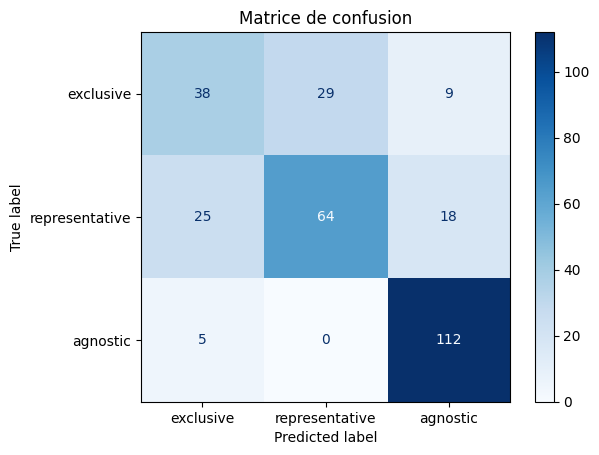

In [115]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("✅ Accuracy:", accuracy_score(y_true, y_pred))
print("🎯 Precision (weighted):", precision_score(y_true, y_pred, average="weighted"))
print("🔁 Recall (weighted):", recall_score(y_true, y_pred, average="weighted"))
print("📊 F1-score (weighted):", f1_score(y_true, y_pred, average="weighted"))

print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["exclusive", "representative", "agnostic"]))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["exclusive", "representative", "agnostic"])

plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matrice de confusion")
plt.grid(False)
plt.show()